In [1]:
from pyerr import ErrorrOutput
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# path to tape28 file for U235 ENDF-7.1
fle = "../pfns/tape28"

create `ErrorrOutput` object with energy limits (outgoing energy) of 1e3 eV to 5 MeV

In [30]:
output = ErrorrOutput(fle, lower_limit=1e3, upper_limit=5e6)

for PFNS, need to look at MT (section) 18, which is fission

In [31]:
pfns = output.sections[18]

`pfns` is a Section object

In [32]:
pfns

the doc string lists the attributes and methods

In [33]:
help(pfns)

Help on Section in module pyerr._section object:

class Section(builtins.object)
 |  Section(energy_lines, mean_lines, covariance_lines, lower_limit=None, upper_limit=None)
 |  
 |  Class to hold a single section (MT value) from an ERRORR file, which includes
 |  the energy grid, the mean value, and the covariance matrix
 |  
 |  Parameters
 |  ----------
 |  energy_lines : list
 |      list of the lines from the file corresponding to the energy grid
 |  
 |  mean_lines : list
 |      list of the lines from the file corresponding to the mean values
 |  
 |  covariance_lines : list
 |      list of the lines from the file corresponding to the covariance
 |  
 |  lower_limit : float, optional, default is None
 |      the lower limit in energy (eV) to cut the values at. If not given, uses the lower 
 |      limit of the matrix in the file. If given, will cut out groups below the lower 
 |      limit. If the lower limit falls within a group, that group is kept
 |  
 |  
 |  upper_limit : fl

the eigenvalues and eigenvectors of the relative covariance matrix are calculated and sorted upon initialization of the object

In [34]:
# eigenvalues
pfns.eig_vals

array([ 2.21655097e-05,  6.23413690e-06,  2.04333268e-10,  9.37372336e-12,
        8.76313750e-12,  7.41865494e-12,  5.75164467e-12,  5.35692750e-12,
        5.09223161e-12,  3.77486968e-12,  3.26204276e-12,  2.54682359e-12,
        1.92930343e-12,  1.37669903e-12,  1.26805885e-12,  1.20646649e-12,
        1.09219574e-12,  1.00264886e-12,  9.72149817e-13,  9.08858000e-13,
        8.96691583e-13,  8.22237014e-13,  6.60048741e-13,  6.13198656e-13,
        5.19731877e-13,  4.40012960e-13,  3.37921652e-13,  3.25399382e-13,
        3.08248058e-13,  2.35895698e-13,  1.48955768e-13,  1.30000027e-13,
        1.13250917e-13,  7.79861458e-14,  3.91847534e-14,  3.05607446e-14,
        2.23184504e-14,  2.00701859e-14,  1.81189135e-14,  1.44578437e-14,
        1.25932313e-14,  1.22923368e-14,  9.54604957e-15,  8.98172630e-15,
        7.77884613e-15,  6.79289432e-15,  6.11938473e-15,  5.73287045e-15,
        4.36891501e-15,  4.00505511e-15,  3.01175631e-15,  2.75902844e-15,
        2.27736179e-15,  

In [35]:
# eigenvectors
pfns.eig_vects

array([[ 6.54597286e-05, -4.64726967e-05,  2.55996314e-04, ...,
        -3.40649916e-05,  8.09455407e-05, -3.26371041e-05],
       [ 7.11303235e-05, -5.07808030e-05,  2.75118018e-04, ...,
         4.70063106e-06, -2.14997022e-04,  1.33267268e-05],
       [ 7.68098647e-05, -5.48191405e-05,  2.99156944e-04, ...,
        -1.46214926e-04,  6.00039784e-05, -1.27752709e-04],
       ...,
       [-1.49076732e-01, -1.09597162e-01, -5.58449715e-02, ...,
         1.98020737e-01,  1.66064144e-02,  1.29777343e-01],
       [-1.35292637e-01, -1.20149558e-01, -9.61842702e-02, ...,
         1.19661239e-01, -8.50706994e-02,  3.55849583e-02],
       [-1.22697828e-01, -1.26424725e-01, -1.32518003e-01, ...,
        -1.42731106e-01, -1.97039253e-01, -2.57695956e-01]])

The eigenvectors can be plotted relative to the largest one

Text(0, 0.5, 'Eigenvalue (relative to max)')

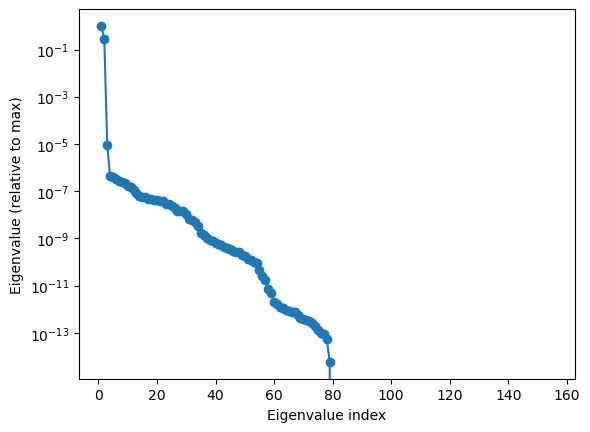

In [36]:
indices = list(range(1,len(pfns.eig_vals)+1))
plt.semilogy(indices, pfns.eig_vals/pfns.eig_vals[0])
plt.scatter(indices,pfns.eig_vals/pfns.eig_vals[0])
plt.xlabel("Eigenvalue index")
plt.ylabel("Eigenvalue (relative to max)")

In this case, the ENDF-7.1 PFNS for U235, the eigenvalues fall off very quickly because there are very strong correlations between outgoing energies

## Reconstruct Covariance 

The covariance matrix can be reconstructed with any number of components using the `reconstruct_covariance` method. This can be used to make plots showing the contribution of the components to the uncertainty

In [37]:
help(pfns.reconstruct_covariance)

Help on method reconstruct_covariance in module pyerr._section:

reconstruct_covariance(k=None) method of pyerr._section.Section instance
    Function to reconstruct the covariance matrix from the 
    largest k eigenvalues
    
    Parameters
    ----------
    k : int, optional, default is None
        the number of eigenvalues to use. If None, will use
        all of the eigenvalues of the covariane matrix
    
    Returns
    -------
    numpy array 
        The covariance matrix reconstructed from the top k
        eigenvalues



Text(0.5, 0, 'Relative Uncertainty')

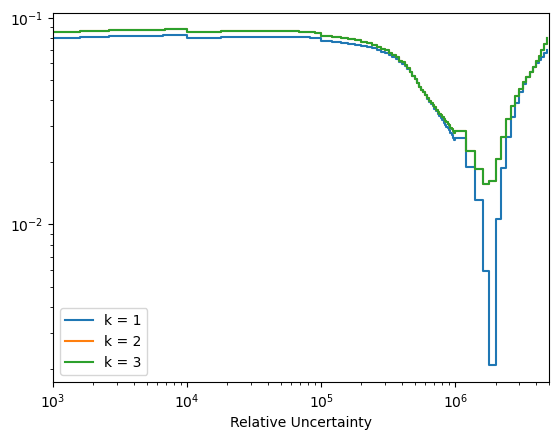

In [39]:
# k is number of components
for k in range(1,4):
    
    # reconstruct cov matrix
    cov = pfns.reconstruct_covariance(k)

    # get uncertainty from cov
    unc = np.sqrt(np.diag(cov))

    #plot
    plt.step(pfns.group_boundaries[:-1],unc/pfns.mean_values,label=f"k = {k}", where='post')

plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.xlim(1e3,5e6)
plt.xlabel("Outgoing neutron energy [eV]")
plt.xlabel("Relative Uncertainty")

## PCA realizations

the method `get_pca_realizations` can produce realizations of the PFNS based on the covariance reconstruct with any number of components

In [40]:
pfns_samples = pfns.get_pca_realizations(k=1,num_samples=10)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'ENDF7.1 Samples with k=1 components')

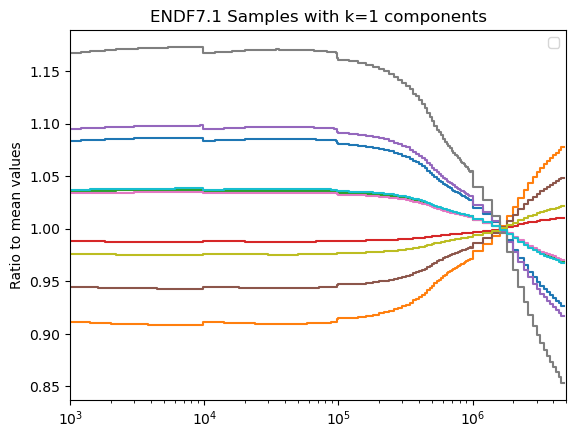

In [42]:
for sample in pfns_samples:
    plt.step(pfns.group_boundaries[:-1],sample/pfns.mean_values)

plt.ylabel("Ratio to mean values")
plt.xscale("log")
plt.xlim(1e3,5e6)
plt.legend()
plt.title("ENDF7.1 Samples with k=1 components")

## Uncertainty convergence

The purpose of using PCA is to reduce the sampling work by using fewer components. One way to determine how many components are needed is to look at how many components are needed to converge the uncertainty vector.

The way I've been doing it so far is to converge each bin, looking at the maximum difference between the full uncertainty vector and the reconstructed uncertainty vector. 

The method `quantify_uncertainty_convergence` will produce a pandas table that has the maximum difference for each value of $k$

In [43]:
help(pfns.quantify_uncertainty_convergence)

Help on method quantify_uncertainty_convergence in module pyerr._section:

quantify_uncertainty_convergence(e_min=0, e_max=30000000.0) method of pyerr._section.Section instance
    Function to quantify the convergence of the uncertainty vector
    as more PCA eigenvalues are added, optionally between certain
    energies.
    
    Parameters
    ----------
    e_min : float, optional, default is 0 eV
        minimum energy to check for convergence at
    
    e_max : float, optional, default is 30 MeV
        maximum energy to check for convergence at
    
    Returns
    -------
    None, creates the attribute unc_convergence_table



the method `quantify_uncertainty_convergence` has two optional arguments, `e_min` and `e_max`, energies in eV, between which to check the convergence. 
In this case, I already cut the distributions between 1e3 eV and 5 MeV when I created the object in the first place. 

The reason for cutting the energy bounds is that the very low energy and very high energy ends of the PFNS spectrum are low intensity and high uncertainty, so it's not necessarily a good idea to include them in the convergence study. The senstivity of the application should be used to determine specific bounds

In [44]:
pfns.quantify_uncertainty_convergence()

this method doesn't return anything, but it creates an attribute `unc_convergence_table`

In [45]:
pfns.unc_convergence_table

,k,abs_diff,abs_ind,rel_diff,rel_ind
0,1,1.418138e-02,139,8.717919e-01,139
1,2,5.576587e-06,14,6.394957e-05,14
2,3,2.855547e-07,14,3.274602e-06,14
3,4,2.560606e-07,14,2.936378e-06,14
4,5,2.435304e-07,14,2.792688e-06,14
...,...,...,...,...,...
150,151,-5.032826e-10,130,-1.672087e-08,130
151,152,-4.174953e-10,130,-1.387071e-08,130
152,153,-2.584385e-11,140,-1.120157e-09,9
153,154,2.385997e-11,12,2.740131e-10,12


`abs_diff` gives the maximum absolute difference between the full and reconstructed uncertainty vector, which occurs at bin index `abs_ind`.

the largest relative difference is given in `rel_diff`, at index `rel+ind`